In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils
import os
#import seaborn as sns
#sns.set(color_codes=True)
data_dir= 'Dataset Preview/Inv3D preview complete V2/data/train/'
data_dir = '/home/sander/Inv3D_pre/inv3d/data/'


In [2]:
DATA_PATH = "/home/sander/Inv3D_pre/inv3d/data/"

from custom_dataset import CustomImageDataset_wc, Dataset_backward_mapping, Dataset_full_model
train_dataset_bm = Dataset_full_model(data_dir=DATA_PATH+'train/', img_size = 256)


from torch.utils.data import DataLoader
train_loader_bm = DataLoader(train_dataset_bm, batch_size=32, num_workers=8, shuffle=True)

for batch in train_loader_bm:
    img , labels = batch

In [3]:
img.shape

torch.Size([5, 3, 256, 256])

In [4]:
for label in labels:
    print(label)

warped_bm
warped_uv
warped_angle
warped_text_mask
wc_gt
warped_curvature_gt


In [26]:
import torch
labels['warped_angle'].shape
a = torch.norm((labels['warped_curvature_gt']- labels['warped_curvature_gt']),p=2,dim=(1))
#l_curvature = torch.norm((curvature_mesh - labels['warped_curvature_gt']),p=2,dim=(1))
print(a.unsqueeze(1).shape)

l1_loss = L1_loss(labels['warped_curvature_gt'],labels['warped_curvature_gt'])
print(l1_loss.shape)


torch.Size([5, 1, 256, 256])
torch.Size([5, 1, 256, 256])


In [12]:
import torch.nn as nn
L1_loss = nn.L1Loss(reduction='none')
l1_loss = L1_loss(labels['warped_bm'],labels['warped_bm'])
l1_loss.shape

torch.Size([5, 2, 256, 256])

torch.Size([2, 256, 256]) tensor(0.9996) tensor(-1.)
torch.Size([2, 256, 256]) tensor(1.) tensor(-1.)
torch.Size([2, 256, 256]) tensor(1.) tensor(-1.)
torch.Size([2, 256, 256]) tensor(1.) tensor(-1.)
torch.Size([2, 256, 256]) tensor(1.0000) tensor(-1.)


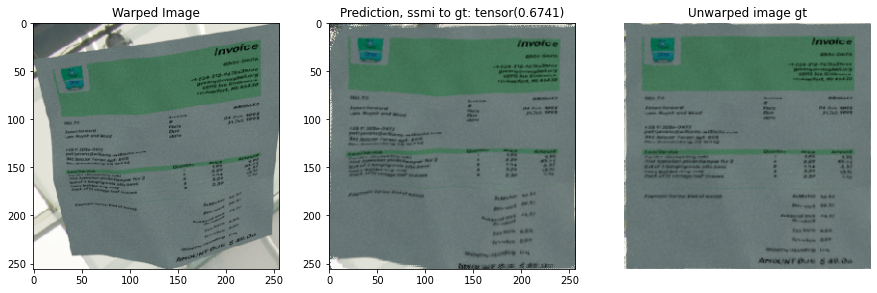

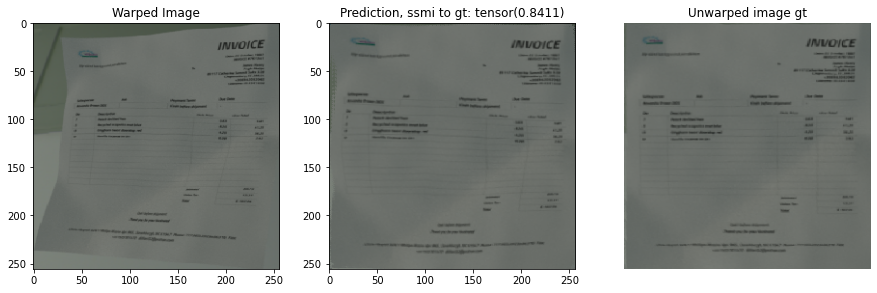

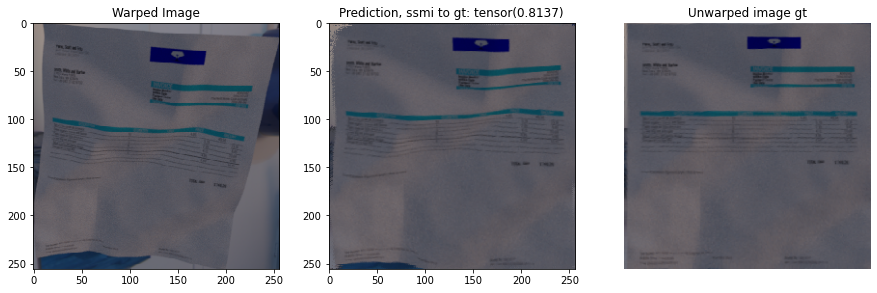

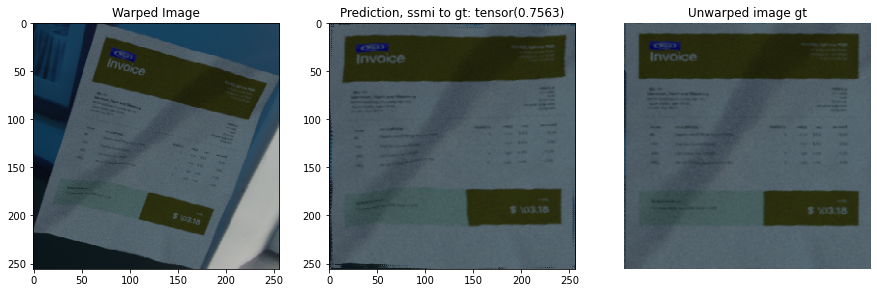

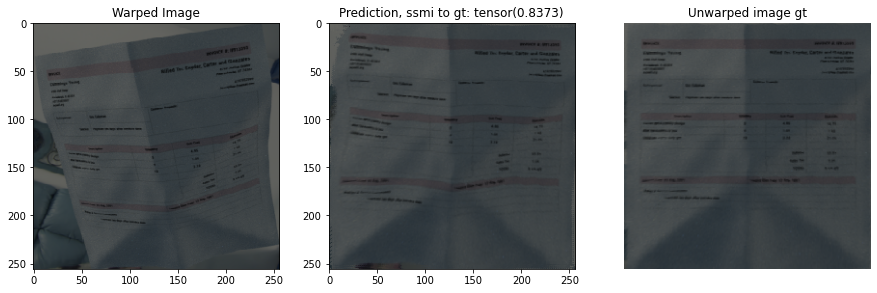

In [3]:
import utils
import torch
from models.backwardmapper import Backwardmapper
bm_model = Backwardmapper()
bm_model.load_state_dict(torch.load('models/pretrained/monster_bm_v2.pkl'))
bm_model.eval()
data_dir = '/home/sander/Inv3D_pre/inv3d/data/'
ordner = sorted(os.listdir(data_dir+'train/'))

for item in ordner[:5]:
    #utils.compare_ssim_all(data_dir + item, bm_model)
    utils.plt_bm_gt_cropped(data_dir + 'train/' + item, bm_model)

In [4]:
from custom_dataset import CustomImageDataset_wc
img_size = (256,256)
train = CustomImageDataset_wc.calculate_min_and_max(data_dir + 'train/', img_size)
val = CustomImageDataset_wc.calculate_min_and_max(data_dir + 'val/', img_size)
test = CustomImageDataset_wc.calculate_min_and_max(data_dir + 'test/', img_size)
#(xmx, xmn, ymx, ymn,zmx, zmn, curv_mx) 
# 1.2361085,-1.2319995, 1.2294204, -1.210581, 0.5923838, -0.62981504,  0.02297426

In [1]:
from icecream import ic
from custom_dataset import CustomImageDataset_wc, Dataset_backward_mapping, Dataset_full_model
train_dataset_bm = Dataset_backward_mapping(data_dir)


from torch.utils.data import DataLoader
train_loader_bm = DataLoader(train_dataset_bm, batch_size=2, num_workers=8, shuffle=True)

from models.backwardmapper import Backwardmapper
bm_model = Backwardmapper()
bm_model.load_state_dict(torch.load('models/pretrained/scale_test_3.pkl'))

e = {'wc': [], 'labels' : [], 'pred': []}

for batch in train_loader_bm:
   wc, labels = batch
   #ic(labels.shape)
   #e['wc'].append(wc[0])
   #e['wc'].append(wc[1])
   e['wc'].append(wc)
   e['labels'].append(labels)
   pred = bm_model(wc)
   #e['pred'].append(pred[0])
   #ic(pred.shape)
   e['pred'].append(pred)

for i in range(len(e['pred'])):
   utils.plt_bm_gt_cropped_2(e['pred'][i][0].unsqueeze(0),e['labels'][i]['img'][0],e['labels'][i]['warped_bm'][0])
   utils.plt_bm_gt_cropped_2(e['pred'][i][1].unsqueeze(0),e['labels'][i]['img'][1],e['labels'][i]['warped_bm'][1])

NameError: name 'data_dir' is not defined

In [ ]:
len(e['pred'])

6

In [ ]:
from custom_dataset import CustomImageDataset_wc, Dataset_backward_mapping, Dataset_full_model
train_dataset_bm = Dataset_backward_mapping(data_dir)


from torch.utils.data import DataLoader
train_loader_bm = DataLoader(train_dataset_bm, batch_size=2, num_workers=8, shuffle=True)

for batch in train_loader_bm:
   images, labels = batch
   print(images.shape)
   for label in labels:
       print(label, labels[label].shape)

torch.Size([2, 3, 256, 256])
warped_bm torch.Size([2, 2, 256, 256])
warped_uv torch.Size([2, 3, 256, 256])
warped_angle torch.Size([2, 2, 256, 256])
warped_text_mask torch.Size([2, 1, 256, 256])
img torch.Size([2, 3, 256, 256])
torch.Size([2, 3, 256, 256])
warped_bm torch.Size([2, 2, 256, 256])
warped_uv torch.Size([2, 3, 256, 256])
warped_angle torch.Size([2, 2, 256, 256])
warped_text_mask torch.Size([2, 1, 256, 256])
img torch.Size([2, 3, 256, 256])
torch.Size([2, 3, 256, 256])
warped_bm torch.Size([2, 2, 256, 256])
warped_uv torch.Size([2, 3, 256, 256])
warped_angle torch.Size([2, 2, 256, 256])
warped_text_mask torch.Size([2, 1, 256, 256])
img torch.Size([2, 3, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
ic| label: 'warped_bm', labels[label].shape: torch.Size([2, 448, 448])
ic| label: 'warped_angle'
    labels[label].shape: torch.Size([2, 256, 256])


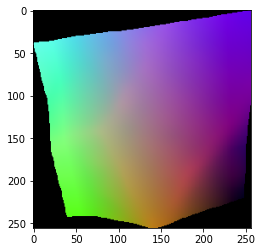

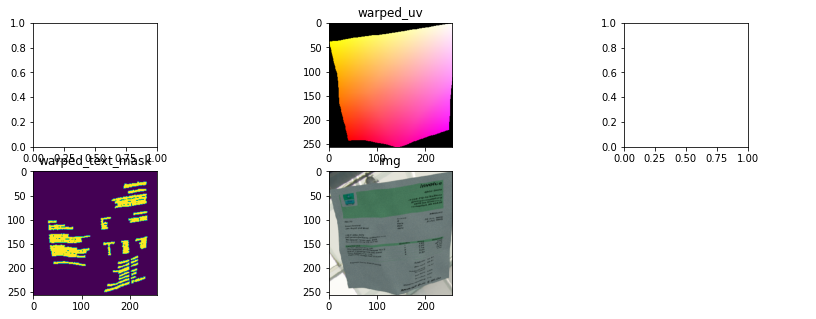

In [ ]:
from icecream import ic
wc, labels = utils.crop_all(data_dir + 'train/0000')
plt.imshow(wc.transpose(0,1).transpose(1,2))
fig, axs = plt.subplots(2,3, figsize=(15,5))
counter = -1
axs = axs.ravel()

for label in labels:
    counter += 1
    try:
        axs[counter].imshow(labels[label].transpose(0,1).transpose(1,2))
        axs[counter].set_title(label)
        #plt.imshow(labels[label].transpose(0,1).transpose(1,2))
    except TypeError:
        #pass
        ic(label,labels[label].shape)

    plt.axis('off')

In [ ]:
from icecream import ic
ordner = sorted(os.listdir(data_dir))
bm_list = []
for item in ordner:
    #utils.compare_ssim_all(data_dir + item, bm_model)
    wc, labels = utils.crop_all(data_dir + item)
    
    print('wc', wc.min(), wc.max())
    for label in labels:
        print(label, labels[label].min(), labels[label].max())


wc tensor(0.) tensor(0.9981)
warped_bm tensor(-1.0011) tensor(0.9911)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.2088) tensor(0.4323)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.1373) tensor(0.6824)
wc tensor(-0.0003) tensor(0.9945)
warped_bm tensor(-1.0024) tensor(0.9915)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.6935) tensor(0.4649)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.) tensor(0.7098)
wc tensor(0.) tensor(0.9926)
warped_bm tensor(-1.0036) tensor(0.9893)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.1553) tensor(1.5494)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.0353) tensor(0.5412)
wc tensor(0.) tensor(0.9925)
warped_bm tensor(-1.0028) tensor(0.9901)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.0868) tensor(0.9781)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.) tensor(0.8824)
wc tensor(0.) tensor(0.9912)
warped_bm tensor(-1.0018) tensor(0.9913)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.34

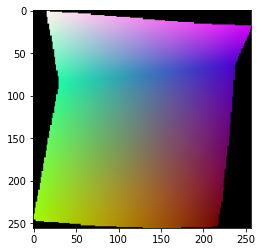

In [ ]:
wc = utils.load_wc_cropped(data_dir + '00/')
wc.shape
plt.imshow(wc.transpose(0,1).transpose(1,2))